# NanoAODplus_analyzer

In [3]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.EventSelectorProcessor import EventSelectorProcessor
from data.fileset import filesets
import yaml

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [4]:
config_yaml = yaml.load(open("config/local.yaml", "r"), Loader=yaml.FullLoader)

if config_yaml['executor'] == 'futures_executor': 
    executor = processor.futures_executor
    
tstart = time.time()

filesets['Charmonium2017MINIAOD'][0:5]

files = {'Charmonium2017ULMINIAOD': filesets['Charmonium2017MINIAOD'][0:50], 
           'MuOnia2017ULMINIAOD': filesets['MuOnia2017MINIAOD'][0:50], 
           'DoubleMuon2017ULAOD': filesets['DoubleMuon2017AOD'][0:50],
           'DoubleMuon2017ULMINIAOD': filesets['DoubleMuon2017MINIAOD'][0:50]
          }

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=EventSelectorProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=config_yaml['chunksize'],
                                 )

elapsed = time.time() - tstart
print(output)


{'muon_pt': <Hist (dataset,pt) instance at 0x7f3958110ac8>, 'muon_eta': <Hist (dataset,eta) instance at 0x7f3958110898>, 'muon_phi': <Hist (dataset,phi) instance at 0x7f3958110588>, 'dimu_mass': <Hist (dataset,mass) instance at 0x7f39581106d8>, 'dimu_pt': <Hist (dataset,pt) instance at 0x7f39581105f8>, 'dimu_eta': <Hist (dataset,eta) instance at 0x7f3958110eb8>, 'dimu_phi': <Hist (dataset,phi) instance at 0x7f3958110a58>, 'D0_mass': <Hist (dataset,mass) instance at 0x7f39581109e8>, 'D0_pt': <Hist (dataset,pt) instance at 0x7f3958110240>, 'D0_eta': <Hist (dataset,eta) instance at 0x7f3958110198>, 'D0_phi': <Hist (dataset,phi) instance at 0x7f39581107b8>, 'cutflow': defaultdict(<class 'int'>, {'all events': 11495053, 'all muons': 52735001, 'all D0': 237437784, 'soft muon': 38275470, 'global muon': 23579533, 'pt cut': 21886130, 'eta cut': 21851293, 'iso muon': 6501020, 'valid vtx': 6500016, 'two muons': 1779517, 'D0 two muons': 30143135, 'opposite charge': 1717695, 'same vtx': 1659141})}

(0.0, 100.0)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


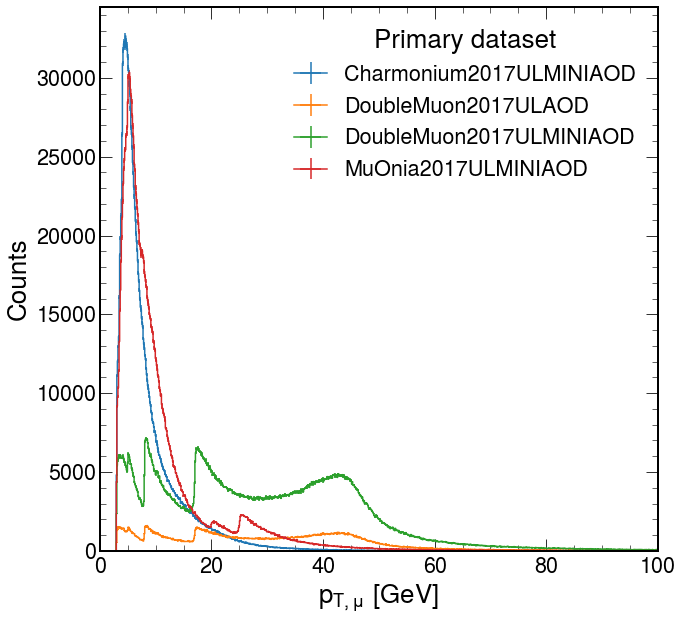

In [5]:
ax = hist.plot1d(output['muon_pt'], overlay='dataset')
ax.set_xlim(0,100)

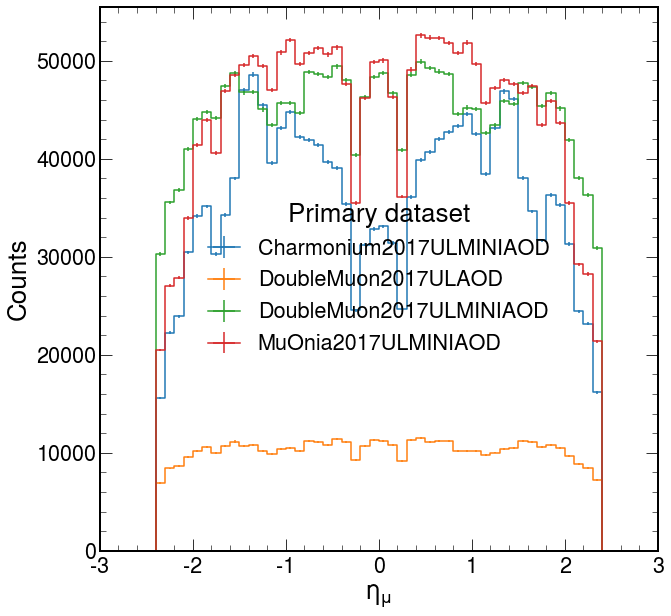

In [6]:
ax = hist.plot1d(output['muon_eta'], overlay='dataset')

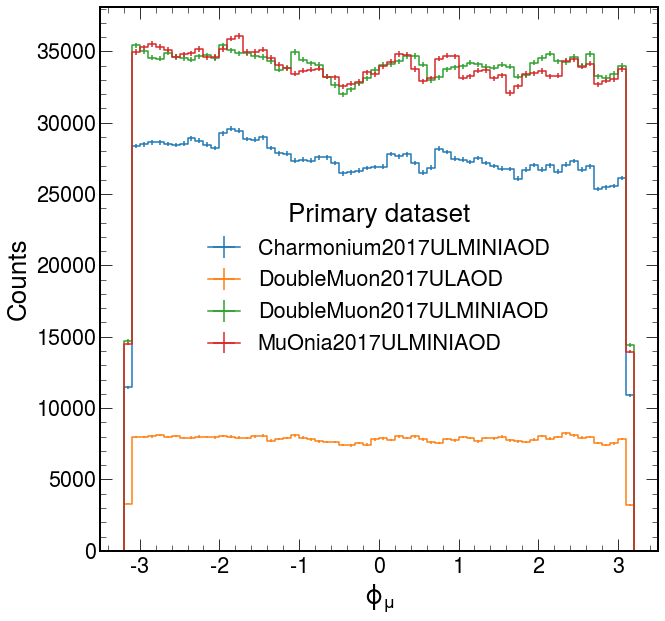

In [7]:
ax = hist.plot1d(output['muon_phi'], overlay='dataset')

(2.5, 12.0)

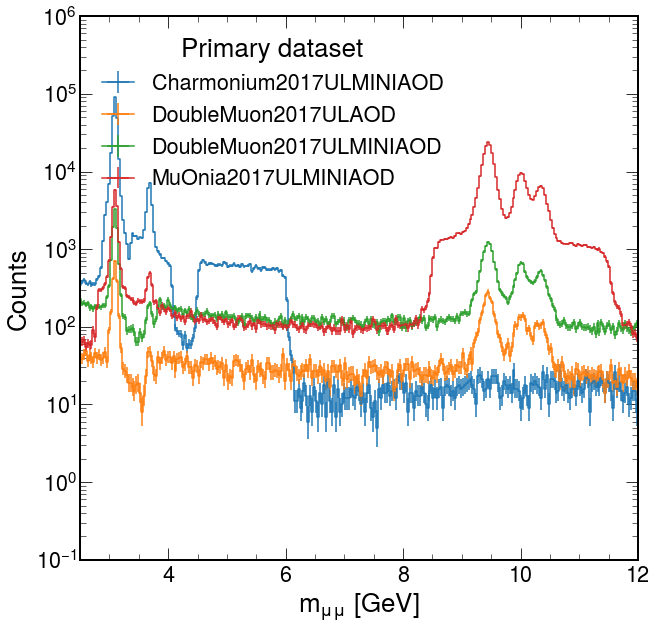

In [8]:
ax = hist.plot1d(output['dimu_mass'], overlay='dataset')
ax.set_yscale('log')
ax.set_ylim(0.1,1e6)
ax.set_xlim(2.5,12)

(0.0, 20.0)

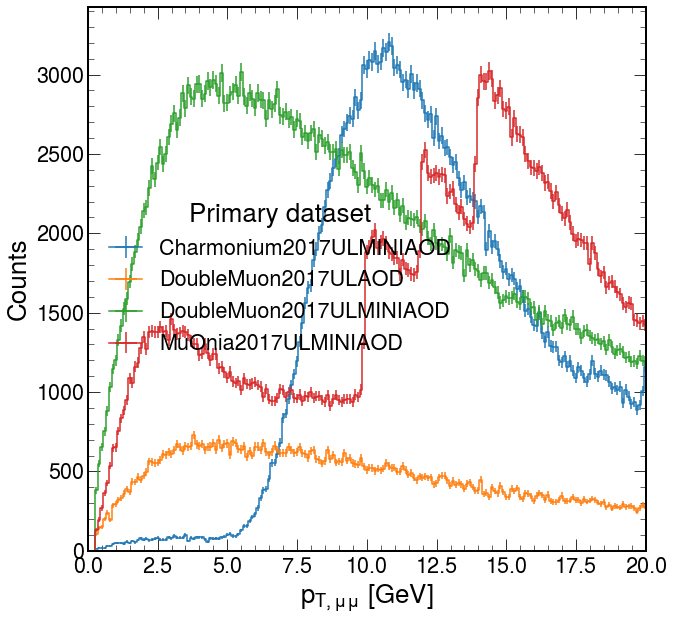

In [9]:
ax = hist.plot1d(output['dimu_pt'], overlay='dataset')
ax.set_xlim(0,20)

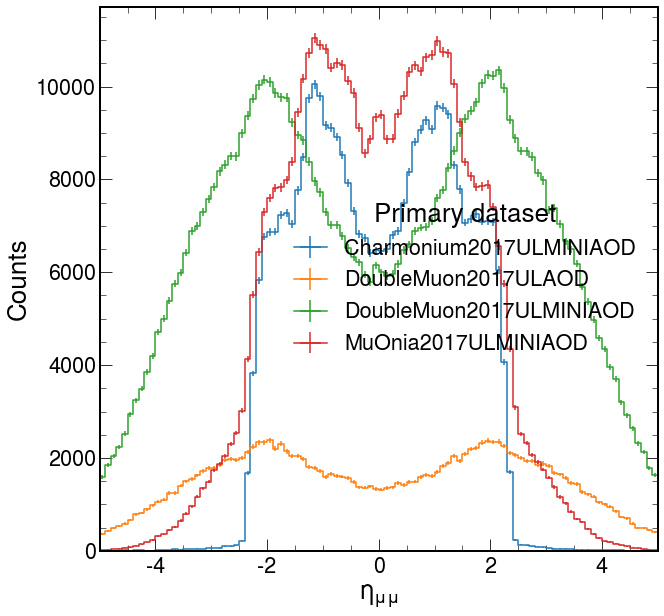

In [10]:
ax= hist.plot1d(output['dimu_eta'], overlay='dataset')

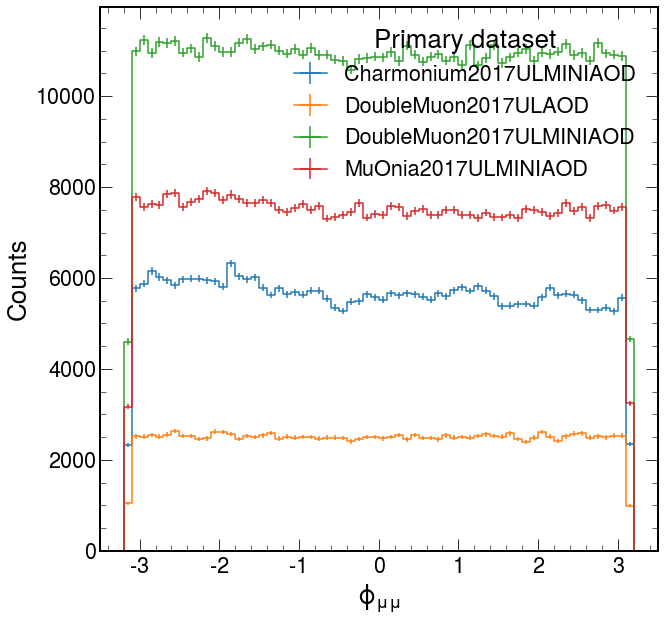

In [11]:
ax= hist.plot1d(output['dimu_phi'], overlay='dataset')

In [12]:
print("Events/s:", output['cutflow']['all events']/elapsed, "Time elapsed:", elapsed)
print(output['cutflow'])

Events/s: 5875.06059856184 Time elapsed: 1956.5845844745636
defaultdict(<class 'int'>, {'all events': 11495053, 'all muons': 52735001, 'all D0': 237437784, 'soft muon': 38275470, 'global muon': 23579533, 'pt cut': 21886130, 'eta cut': 21851293, 'iso muon': 6501020, 'valid vtx': 6500016, 'two muons': 1779517, 'D0 two muons': 30143135, 'opposite charge': 1717695, 'same vtx': 1659141})


(1.0, 2.5)

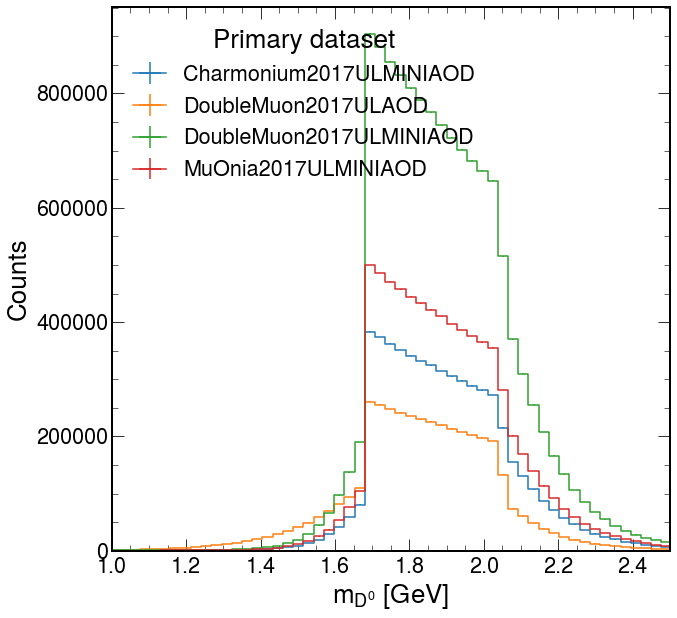

In [13]:
ax= hist.plot1d(output['D0_mass'], overlay='dataset')
ax.set_xlim(1.0,2.5)

In [ ]:
ax= hist.plot1d(output['D0_pt'], overlay='dataset')
ax.set_xlim(0,10)

In [ ]:
ax= hist.plot1d(output['D0_eta'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_phi'], overlay='dataset')